<a href="https://colab.research.google.com/github/BronteDallas/Data_Architecture/blob/main/Simplified_Algorithm_Selection_KNeighborsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
datapath = 'https://raw.githubusercontent.com/a-forty-two/DFE5/main/breastcancer_data.csv'
data = pd.read_csv(datapath, header=0)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [2]:
data.info()
#no null values for us!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1138 non-null   int64  
 1   diagnosis               1138 non-null   object 
 2   radius_mean             1138 non-null   float64
 3   texture_mean            1138 non-null   float64
 4   perimeter_mean          1138 non-null   float64
 5   area_mean               1138 non-null   float64
 6   smoothness_mean         1138 non-null   float64
 7   compactness_mean        1138 non-null   float64
 8   concavity_mean          1138 non-null   float64
 9   symmetry_mean           1138 non-null   float64
 10  fractal_dimension_mean  1138 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 97.9+ KB


In [3]:
correlations = data.corr() 
correlations 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.052010,0.069534,0.050988,0.067529,-0.009038,0.000067,0.034903,-0.015412,-0.036598
radius_mean,0.052010,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.147741,-0.311631
texture_mean,0.069534,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.071401,-0.076437
perimeter_mean,0.050988,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.183027,-0.261477
area_mean,0.067529,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.151293,-0.283110
smoothness_mean,-0.009038,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.557775,0.584792
compactness_mean,0.000067,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.602641,0.565369
concavity_mean,0.034903,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.500667,0.336783
symmetry_mean,-0.015412,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,1.000000,0.479921
fractal_dimension_mean,-0.036598,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.479921,1.000000


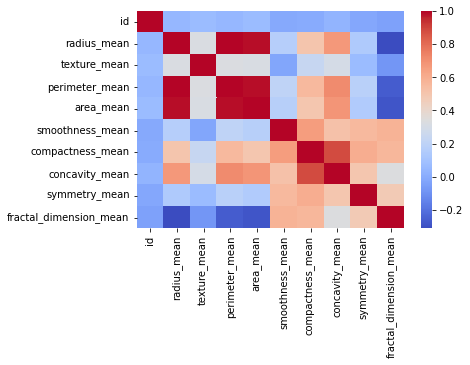

In [4]:
import seaborn as sns # visualization library 
sns.heatmap(correlations, cmap='coolwarm') # coolwarm-> red and blue color style

In [5]:
# convert ID to indexes instead of removing!
data = data.set_index("id")
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [6]:
# Normalizing data 
# ONLY for input! 
# output-> in our case is M and B
# ML only happens on numbers!
# way to convert M and B into 1 and 0 

In [7]:
# all X1...xN-> normalize
# all y -> encode into numbers

In [8]:
y = data.loc[:, ['diagnosis']]
x = data.iloc[:, 1:]

In [9]:
y.head()

,diagnosis
id,
842302,M
842517,M
84300903,M
84348301,M
84358402,M


In [10]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [11]:
import sklearn 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(x, y, test_size=0.2)

In [12]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
919812,11.69,24.44,76.37,406.4,0.12360,0.15520,0.04515,0.2131,0.07405
8910720,10.71,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.1668,0.06862
868871,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.1771,0.06072
92902,13.00,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.2540,0.06087
93036,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.1432,0.05935


In [13]:
xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
92878,13.610,24.69,87.76,572.6,0.09258,0.07862,0.05285,0.1761,0.06130
85922302,12.680,23.84,82.69,499.0,0.11220,0.12620,0.11280,0.1905,0.06590
853401,18.630,25.11,124.80,1088.0,0.10640,0.18870,0.23190,0.2183,0.06197
8912521,12.580,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.1697,0.05855
92813,8.598,20.98,54.66,221.8,0.12430,0.08963,0.03000,0.1828,0.06757


In [14]:
# Normalize the data
# Calculate mean and standard dev for training data
# apply the same assumptions to testing data also

In [15]:
stats = xtrain.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
radius_mean,910.0,14.139920,3.439114,6.98100,11.710000,13.370000,15.780000,27.42000
texture_mean,910.0,19.285110,4.370121,9.71000,16.070000,18.785000,21.715000,39.28000
perimeter_mean,910.0,92.012769,23.738747,43.79000,75.317500,86.180000,103.775000,186.90000
area_mean,910.0,654.228681,341.846488,143.50000,421.000000,551.700000,782.600000,2501.00000
smoothness_mean,910.0,0.095989,0.014005,0.05263,0.085550,0.094920,0.104900,0.16340
compactness_mean,910.0,0.102993,0.052723,0.01938,0.063407,0.090505,0.129600,0.34540
concavity_mean,910.0,0.086333,0.077866,0.00000,0.029240,0.059285,0.123275,0.42680
symmetry_mean,910.0,0.180500,0.026480,0.10600,0.161825,0.179150,0.195550,0.29060
fractal_dimension_mean,910.0,0.062499,0.006827,0.04996,0.057562,0.061310,0.065780,0.09744


In [16]:
xmean = stats['mean']
xstd = stats['std']


In [17]:
xtrain_norm = (xtrain - xmean)/xstd
xtest_norm = (xtest - xmean)/xstd

In [18]:
xtrain_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
919812,-0.712369,1.179576,-0.658955,-0.724971,1.971453,0.990216,-0.528898,1.231139,1.691889
8910720,-0.997327,0.252828,-0.948355,-0.904876,0.871880,0.491382,-0.023800,-0.517375,0.896567
868871,-0.831586,-1.348958,-0.800917,-0.788157,1.457367,0.201185,-0.513487,-0.128396,-0.260531
92902,-0.331457,0.342071,-0.358181,-0.394413,1.250304,-0.514063,-0.705997,2.775723,-0.238561
93036,-0.363442,-0.820369,-0.334170,-0.402604,-1.271574,-0.136429,0.323206,-1.408626,-0.461193


In [19]:
logic = { 'M': 1, 'B': 0}
ytrain_encoded = ytrain['diagnosis'].map(lambda diag: logic[diag])
ytest_encoded = ytest['diagnosis'].map(lambda diag: logic[diag])


In [20]:
ytest_encoded

id
92878       1
85922302    1
853401      1
8912521     0
92813       0
           ..
92754       1
92834       1
921386      0
93280       0
864018      0
Name: diagnosis, Length: 228, dtype: int64

In [21]:
# Metrics
# classification -> accuracy, cross_validation_score 
# accuracy= correct guesses / total guesses 
# cross validation-> break the data-> d1, d2....
# for each dataset d1...dn-> we will calculate accuracy
# validate-> accuracy is consistent across all subsets!

In [22]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
all_accuracies = []
all_csv = []

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtrain_norm, ytrain_encoded)


KNeighborsClassifier()

In [24]:
predictions = model.predict(xtest_norm)

In [25]:
predictions

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0])

In [26]:
accuracy_score(ytest_encoded, predictions)

0.9298245614035088

In [27]:
cross_val_score(model, xtrain_norm, ytrain_encoded, cv=5)

# Overfitting-> this algorithm is biased towards 1st,2nd,4th and 5th subsets!


array([0.95054945, 0.95604396, 0.93406593, 0.94505495, 0.94505495])

In [28]:
from sklearn.linear_model import SGDClassifier # gradient descent
from sklearn.svm import SVC, LinearSVC # graph
from sklearn.naive_bayes import GaussianNB # probability
from sklearn.tree import DecisionTreeClassifier # TREE based 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
allalgos = {"Stochastic Gradient Descend":SGDClassifier(),
            "Support Vector Machines": SVC(),
            "Linear SVM": LinearSVC(),
            "Gaussian Naive Bayes'": GaussianNB(),
            "Tree Tree": DecisionTreeClassifier(),
            "Jungle": RandomForestClassifier(),
            "KNN": KNeighborsClassifier()}

In [29]:
for algoName, model in allalgos.items():
  print('*****')
  print(algoName)
  model.fit(xtrain_norm, ytrain_encoded)
  predictions = model.predict(xtest_norm)
  accScore = accuracy_score(ytest_encoded, predictions)
  cvScore = cross_val_score(model, xtrain_norm, ytrain_encoded, cv=5)
  all_accuracies.append([algoName,accScore])
  all_csv.append([algoName, cvScore])
  print(accScore)
  print(cvScore)
  





*****
Stochastic Gradient Descend
0.9210526315789473
[0.94505495 0.92307692 0.93956044 0.92857143 0.92307692]
*****
Support Vector Machines
0.9429824561403509
[0.95604396 0.95604396 0.95604396 0.96153846 0.96153846]
*****
Linear SVM


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.9166666666666666
[0.94505495 0.94505495 0.93956044 0.94505495 0.94505495]
*****
Gaussian Naive Bayes'
0.868421052631579
[0.93406593 0.93406593 0.92307692 0.93406593 0.91208791]
*****
Tree Tree
0.9649122807017544
[0.98351648 0.96153846 0.96153846 0.93406593 0.97802198]
*****
Jungle
0.9912280701754386
[0.98901099 0.99450549 0.96703297 0.95054945 0.97802198]
*****
KNN
0.9298245614035088
[0.95054945 0.95604396 0.93406593 0.94505495 0.94505495]


In [30]:
# Select the algorithm with highest accuracy and consistent CVS!


In [31]:
all_accuracies

[['Stochastic Gradient Descend', 0.9210526315789473],
 ['Support Vector Machines', 0.9429824561403509],
 ['Linear SVM', 0.9166666666666666],
 ["Gaussian Naive Bayes'", 0.868421052631579],
 ['Tree Tree', 0.9649122807017544],
 ['Jungle', 0.9912280701754386],
 ['KNN', 0.9298245614035088]]